<div style="text-align: center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/d/df/Logo_UNIR.png" alt="logo_unir" style="height: 200px; width: 245px;">
</div>

<div style="text-align: center;font-family: georgia; font-weight: bold; color: black">
    <h1 style="font-size: 20px; margin-top:10px">  ACTIVIDAD N° 2 </h1>
    <h1 style="font-size: 20px; color: #104675"> INTERPOLACIONES </h1>
    <h1 style="font-size: 20px; margin-top:50px"> ASIGNATURA  </h1>
    <h1 style="font-size: 20px; color: #104675"> PROGRAMACIÓN CIENTÍFICA Y HPC  </h1>   
    <h1 style="font-size: 20px; margin-top:50px"> INTEGRANTES  </h1>    
    <h1 style="font-size: 20px; color: #104675"> ARRIAGA GRAU RICARDO ANDRES  </h1>
    <h1 style="font-size: 20px; color: #104675"> LADRÓN DE GUEVARA VERGARA GUILLERMO  </h1>
    <h1 style="font-size: 20px; color: #104675"> MERA MURILLO ANDERSON DANIEL  </h1>
    <h1 style="font-size: 20px; color: #104675"> OTERO BENITO AMANDA  </h1>
    <h1 style="font-size: 20px; color: #104675"> RAMOS MARTÍNEZ JOSE LUIS  </h1>
    <h1 style="font-size: 20px; margin-top:50px"> DOCENTE  </h1>    
    <h1 style="font-size: 20px; color: #104675"> JESUS CIGALES CANGA  </h1>
    <h1 style="font-size: 20px; margin-top:30px"> AÑO  </h1>    
    <h1 style="font-size: 20px; color: #104675"> 2025  </h1>
</div>

<h1 style="color: #104675">Tarea 1. Interpolación polinómica</h1>

<h2> ▶️ Métodos de interpolación:</h2>

<h3 style="color: #104675"> ✅ 1.1. Método de interpolación baricéntrica</h3>

INICIO DEL PROCESO DE INTERPOLACIÓN

Función 'sin(x)', N=11, Tipo de nodo: Equiespaciados
  Nodos (x): [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
  Valores f(x) en nodos: [-0.8415 -0.7174 -0.5646 -0.3894 -0.1987  0.      0.1987  0.3894  0.5646
  0.7174  0.8415]
  Error interpolación Baricéntrica: 1.3884e-09
  Tiempo cálculo Baricéntrica: 1.2722e-03 segundos
  Error interpolación Spline: 2.3894e-04
  Tiempo cálculo Spline: 1.1706e-04 segundos

Función 'Runge', N=11, Tipo de nodo: Equiespaciados
  Nodos (x): [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
  Valores f(x) en nodos: [0.0385 0.0588 0.1    0.2    0.5    1.     0.5    0.2    0.1    0.0588
 0.0385]
  Error interpolación Baricéntrica: 1.2965e+01
  Tiempo cálculo Baricéntrica: 5.0521e-04 segundos
  Error interpolación Spline: 1.6030e-01
  Tiempo cálculo Spline: 1.0824e-04 segundos

Función 'Gauss', N=11, Tipo de nodo: Equiespaciados
  Nodos (x): [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
  Val

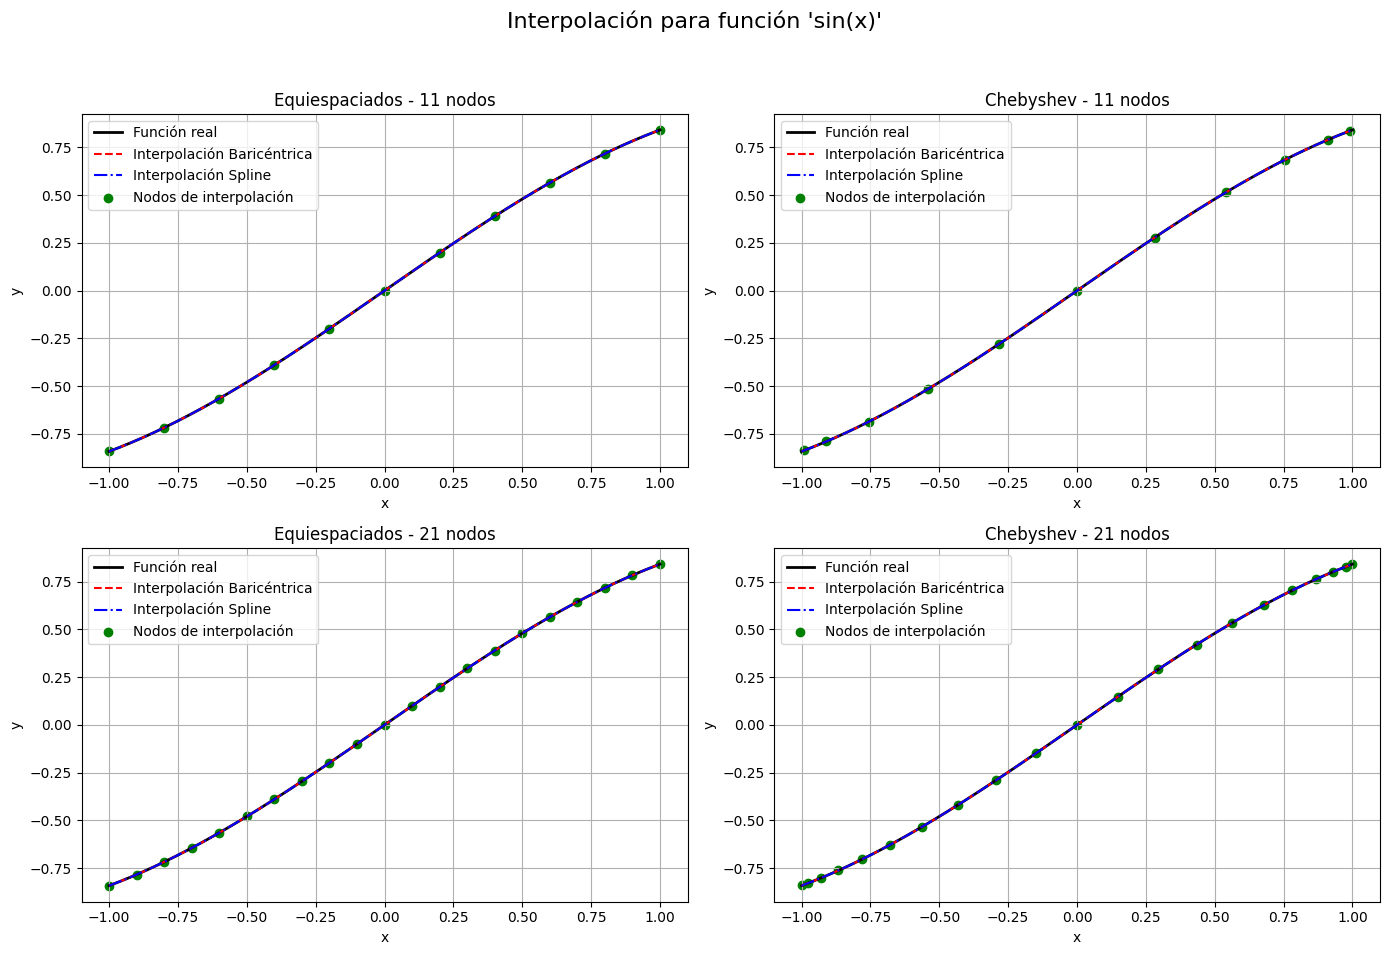

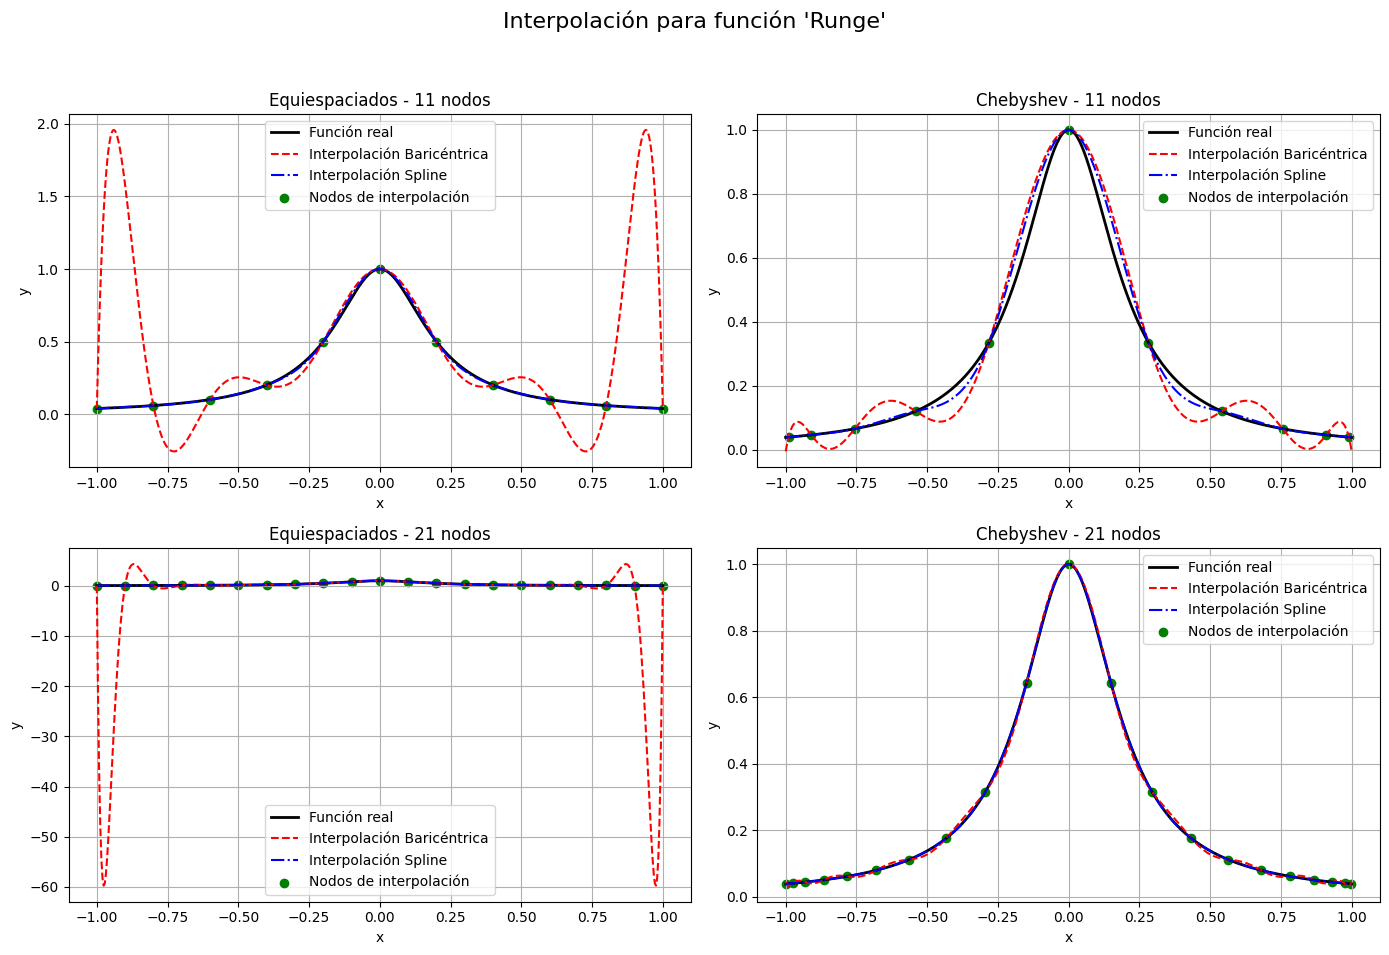

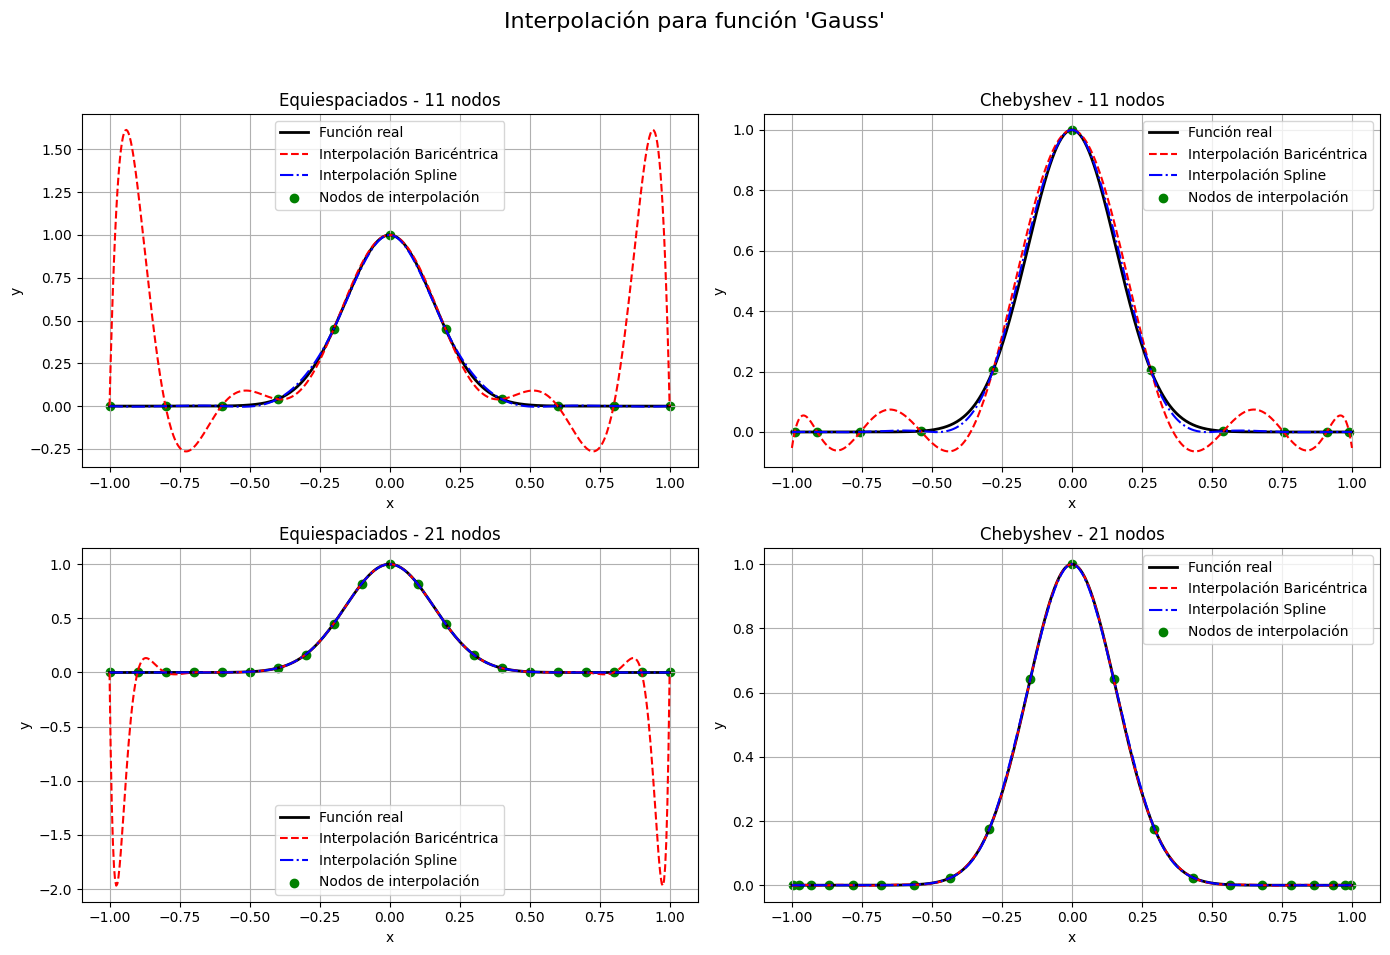

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate, splrep, splev, InterpolatedUnivariateSpline # Adiciono libreria adicional rag
from numpy.polynomial import Chebyshev
import time

# 1. Definición de funciones originales a interpolar
def f_sin(x):
    return np.sin(x)

def f_runge(x):
    return 1 / (1 + 25 * x**2)

def f_gauss(x):
    return np.exp(-20 * x**2)

funciones = {
    'sin(x)': f_sin,
    'Runge': f_runge,
    'Gauss': f_gauss
}

# 2. Función para generar nodos equiespaciados en [-1,1]
def nodos_equiespaciados(n):
    return np.linspace(-1, 1, n)

# 3. Función para generar nodos de Chebyshev (raíces del polinomio de Chebyshev)
def nodos_chebyshev(n):
    # Fórmula para las raíces de Chebyshev en [-1,1]
    k = np.arange(1, n+1)
    x_cheb = np.cos((2*k - 1) / (2*n) * np.pi)
    return x_cheb

# 4. Función para calcular el error absoluto entre la función real y la interpolación
def error_abs(f_true, f_interp):
    return np.linalg.norm(f_true - f_interp)

# 5. Creación de puntos densos para evaluar la función real y la interpolación
x_denso = np.linspace(-1, 1, 500)

# 6. Definir los números de nodos a usar
nodos_a_usar = [11, 21]

# 7. Diccionario para almacenar resultados
resultados = {}

print("INICIO DEL PROCESO DE INTERPOLACIÓN\n")

# 8. Bucle sobre número de nodos, tipo de nodo y función
for n in nodos_a_usar:
    for tipo_nodo, nodo_func in [('Equiespaciados', nodos_equiespaciados), ('Chebyshev', nodos_chebyshev)]:
        
        # 8.1 Obtención de nodos según el tipo
        x_nodos = nodo_func(n)
        
        for nombre_func, f in funciones.items():
            
            # 8.2 Evaluación de la función en los nodos
            y_nodos = f(x_nodos)
            
            # Explicación:
            # Para cada función y conjunto de nodos, evaluamos f(x) para obtener los valores "exactos"
            # en esos puntos. Estos puntos serán usados para construir las interpolaciones.
            print(f"Función '{nombre_func}', N={n}, Tipo de nodo: {tipo_nodo}")
            print(f"  Nodos (x): {np.round(x_nodos, 4)}")
            print(f"  Valores f(x) en nodos: {np.round(y_nodos, 4)}")
            
            # 8.3 Evaluación de la función real en los puntos densos para comparación
            y_true = f(x_denso)
            
            # 8.4 Interpolación baricéntrica
            t0 = time.time()
            y_bary = barycentric_interpolate(x_nodos, y_nodos, x_denso)
            t_bary = time.time() - t0
            err_bary = error_abs(y_true, y_bary)
            
            # Explicación:
            # El método baricéntrico es un método eficiente para interpolar polinomios
            # usando los nodos y valores dados. Se evalúa en muchos puntos para comparar.

            
            # 8.5 Interpolación spline cúbica
            t0 = time.time()
            orden = np.argsort(x_nodos)
            x_nodos_orden = x_nodos[orden]
            y_nodos_orden = y_nodos[orden]
            tck = splrep(x_nodos_orden, y_nodos_orden)
            y_spline = splev(x_denso, tck)
            t_spline = time.time() - t0
            err_spline = error_abs(y_true, y_spline)
            
            # Explicación:
            # La interpolación spline ajusta una curva suave de segmentos cúbicos que pasan
            # por los puntos. Es más flexible y a menudo mejora la estabilidad para muchos nodos.
            
            # 8.6 Guardar resultados para análisis y graficar
            resultados[(nombre_func, n, tipo_nodo)] = {
                'x_nodos': x_nodos,
                'y_nodos': y_nodos,
                'y_true': y_true,
                'y_bary': y_bary,
                'y_spline': y_spline,
                'err_bary': err_bary,
                'err_spline': err_spline,
                't_bary': t_bary,
                't_spline': t_spline,
            }
            
            # 8.7 Mostrar errores y tiempos
            print(f"  Error interpolación Baricéntrica: {err_bary:.4e}")
            print(f"  Tiempo cálculo Baricéntrica: {t_bary:.4e} segundos")
            print(f"  Error interpolación Spline: {err_spline:.4e}")
            print(f"  Tiempo cálculo Spline: {t_spline:.4e} segundos\n")

print("FIN DEL PROCESO DE INTERPOLACIÓN\n")

# 9. Graficar resultados para cada función, con filas = número de nodos y columnas = tipo de nodo
for nombre_func in funciones.keys():
    plt.figure(figsize=(14, 10))
    plt.suptitle(f"Interpolación para función '{nombre_func}'", fontsize=16)
    
    for i, n in enumerate(nodos_a_usar, 1):
        for j, tipo_nodo in enumerate(['Equiespaciados', 'Chebyshev'], 1):
            plt.subplot(len(nodos_a_usar), 2, (i-1)*2 + j)
            res = resultados[(nombre_func, n, tipo_nodo)]
            
            plt.plot(x_denso, res['y_true'], 'k-', label='Función real', linewidth=2)
            plt.plot(x_denso, res['y_bary'], 'r--', label='Interpolación Baricéntrica')
            plt.plot(x_denso, res['y_spline'], 'b-.', label='Interpolación Spline')
            plt.scatter(res['x_nodos'], res['y_nodos'], c='green', marker='o', label='Nodos de interpolación')
            
            plt.title(f"{tipo_nodo} - {n} nodos")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()






## 📑 Interpretación de los gráficos y resultados

**<font color=green> 1.** **<font color=green> COMPARACIÓN DE MÉTODOS (BARICÉNTRICO vs SPLINE):**
* **Interpolación baricéntrica:**
  Es un método polinómico clásico que ajusta un polinomio que pasa exactamente por todos     los nodos. Es muy rápido y preciso cuando los nodos están bien elegidos, pero puede presentar oscilaciones fuertes en los extremos si los nodos son equiespaciados y el grado es alto (especialmente visible en la función de Runge).

* **Interpolación spline cúbica:**
  Usa segmentos polinómicos cúbicos entre nodos, garantizando continuidad suave en el primer y segundo derivado. Esto genera curvas más suaves y evita oscilaciones extremas, por lo que suele ser más estable en muchos casos, aunque su tiempo de cálculo puede ser ligeramente mayor. 

**<font color=green> 2.** **<font color=green> TIPO DE NODOS (EQUIESPACIADOS vs CHEBYSHEV):**
* **Nodos equiespaciados:**
  Son sencillos y uniformes, pero generan el conocido **_"efecto Runge"_** cuandd se usa interpolación polinímica de alto grado, provocando oscilaciones en los extremos del intervalo, especialmente visible en la función f(x) = 1/(1 + 25x^2).

* **Nodos de Chebyshev:**
  Son las raíces del polinomio de Chebyshev y están densificados cerca de de los extremos del intervalo, lo que reduce las oscilaciones y mejora la estabilidad de la interpolación polinómica. Por eso, la interpolación baricéntrica con nodos de Chevyshev produce aproximaciones mucho más precisas para fucniones difíciles como la de Runge.

**<font color=green> 3.** **<font color=green> NÚMERO DE NODOS (11 vs 21):**
* En genereal, al aumentar el número de nodos, mejora la aproximación, pero para polinomios con nodos equiespaciados puede agravar las oscilaciones en la interpolación baricéntrica.

* Con nodos de Chebyshev o splines, más nodos, disminuyen el error y hacen la aproximación más precisa.

**<font color=green> 4.** **<font color=green> ANÁLISIS POR FUNCIÓN:**
* **Sin(x):**
  Función suave y periódica. Ambos métodos funcionan bien con cualquier tipo de nodo, pero la spline puede ser más suave en el ajuste. No suele presentar problemas de oscilación.

* **Runge (1/(1+25x^2)):**
  Función con picos y zonas planas. La interpolación baricéntrica con nodos equiespaciados sufre oscilaciones en los extremos (_efecto Runge_), aumentando mucho el error. Cambuair a nodos de Chebyshev reduce esas oscilaciones notablemente. Las splines suavizan aún más la curva, manteniendo bajo el error y la estabilidad.

* **Gauss (e^{-20x^2}):**
  Función con pico central pronunciado y caídas rápidas. La interpolación polinómica baricéntrica funciona razonablemente bien con Chebyshev, pero puede mostrar oscilaciones si son equiespaciados y muchos nodos. Las esplines ofrecen una interpolación muy estable y suave.

**<font color=green> 5.** **<font color=green> ERRORES Y TIEMPOS:**
* Los errores calculados reflejan los puntos anteriores:

  - Menores errores con nodos de Chebyshev para polinomios baricéntricos.
    
  - Las splines suelen tener errores comparables o menores que el polinomio baricéntrico con nodos equiespaciados.

* En cuanto a tiempos:

  - La interpolación baricéntrica es generalmente más rápida, pues calcula directamente el polinomio.
    
  - La spline requiere cálculo y evaluación de coeficientes de segmentos, por lo que es un poco más lenta, pero en un contexto normal, la diferencia es mínima y justificada por la estabilidad que aporta.


## 📑 Conclusiones

- Para interpolaciones polinómicas de grado alto, **usar nodos de Chebyshev** es una excelente práctica para evitar oscilaciones y reducir errores.

- Si se necesita una curva suave y estable, especialemnte cuando no se requiere un polinomio global, la **interpolación spline cúbica** es la mejor opción-

- El **método baricéntrico** es eficiente y preciso para pocos nodos y nodos bien elegidos, pero menos estable con nodos equiespaciados y funciones con comportamiento complicado.

- En las **gráficas** se pueden observar: curvas con oscilaciones o, suaves y estables, dependiendo de cada método y tipo de nodo.

<h3 style="color: #104675"> ✅ 1.2. Método de interpolación de Lagrange</h3>

## 📑 Importación de librerías necesarias

<p>Lo primero que necesitamos realizar es importar las librerias que vamos a requerir para la actividad. Para este caso necesitamos importar:</p>
<li>numpy</li>
<li>matplotlib</li>
<li>time</li>
<li>scipy</li>

In [10]:
import numpy as np
from numpy.polynomial import chebyshev
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate, lagrange, InterpolatedUnivariateSpline
from scipy.optimize import newton
import time

## 📑 Definición de funciones a interpolar

<p>Como siguiente paso se debe definir las funciones que vamos a interpolar, por lo que tenemos tres funciones que son:</p>
<li>f(x)=  sin⁡(x)</li>
<li>f(x)=1/(1+25x^2 )</li>
<li>f(x)=e^(-20x^2 )</li>

In [11]:
def f1(x): return np.sin(x)
def f2(x): return 1 / (1 + 25 * x**2)
def f3(x): return np.exp(-20 * x**2)

## 📑 Funciones para generar nodos equiespaciados y de Chebyshev
<p>Para la obtención de los nodos necesitamos definir las funciones de equiespaciados y de Chebyshev</p>

In [12]:
def equispaced_nodes(a, b, n):
    return np.linspace(a, b, n)

def chebyshev_nodes(a, b, n):
    i = np.arange(1, n + 1)
    x = np.cos((2*i - 1) * np.pi / (2*n))
    return 0.5 * (b - a) * x + 0.5 * (b + a)

## 📑 Función para evaluar la interpolación de Lagrange y calcular error y tiempo

In [13]:
def evaluate_lagrange(f, x_nodes, x_eval):
    y_nodes = f(x_nodes)
    start = time.time()                      # se inicia el tiempo
    poly = lagrange(x_nodes, y_nodes)        # se crea el polinomio
    y_interp = poly(x_eval)                  # se procede a evaluar el polinomio
    elapsed = time.time() - start            # se mide el tiempo
    error = np.abs(f(x_eval) - y_interp)     # se calcula el error absoluto
    return y_interp, error, elapsed, poly

<p>En esta función se realiza:</p>
<li>La Interpolación usando lagrange</li>
<li>La evaluación del polinomio</li>
<li>El cálculo del error absoluto</li>
<li>El cálculo del tiempo de ejecución</li>

## 📑 Función para graficar la función real vs. la interpolada

<p>Este fragmento dibuja la función real y la función interpolada en un mismo gráfico.</p>

In [14]:
def plot_interp(f, x_eval, y_interp, title):
    plt.figure(figsize=(5, 3))
    plt.plot(x_eval, f(x_eval), label='Función real', lw=2)
    plt.plot(x_eval, y_interp, '--', label='Interpolación Lagrange', lw=2)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

<p>A continuación, se detalla la función a graficar, se define el número y tipo de nodos, se ejecuta mediante el método de Lagrange y por último se muestra el error y el tiempo</p>

## 📑 Función 1: f(x) = sin(x)

##### Función 1 con los 11 nodos equiespaciados

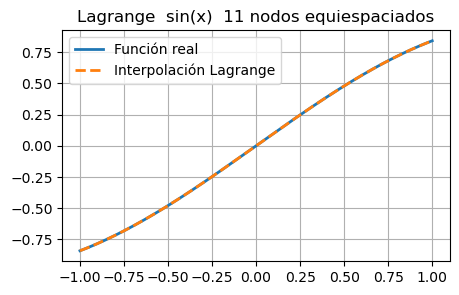

In [272]:
f = f1 # Seleccionamos la función f1, que es sin(x)
a, b = -1, 1 # Definimos el intervalo de interpolación, desde a = -1 hasta b = 1
n = 11 # Número de nodos que vamos a usar para interpolar

# Generamos un array de 500 puntos equiespaciados dentro del intervalo [a, b]
x_eval = np.linspace(a, b, 500)

# Generamos los nodos de interpolación, en este caso nodos equiespaciados dentro del intervalo [a, b]
x_nodes = equispaced_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original f(x) y el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange  sin(x)  11 nodos equiespaciados")

error_11_eq = np.mean(error)
tiempo_11_eq = tiempo

##### Función 1 con los 11 nodos Chebyshev

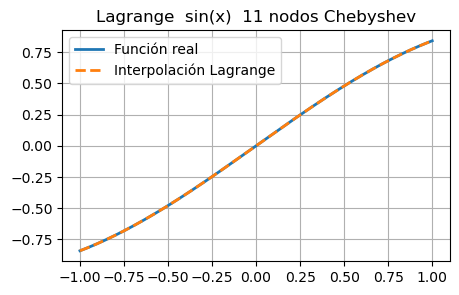

In [273]:
x_nodes = chebyshev_nodes(a, b, n) # Generamos los nodos de interpolación usando los nodos de Chebyshev

# Ejecutamos la interpolación de Lagrange con la función original f
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange  sin(x)  11 nodos Chebyshev")

error_1_ch = np.mean(error)
tiempo_11_ch = tiempo

##### Función 1 con los 21 nodos equiespaciados

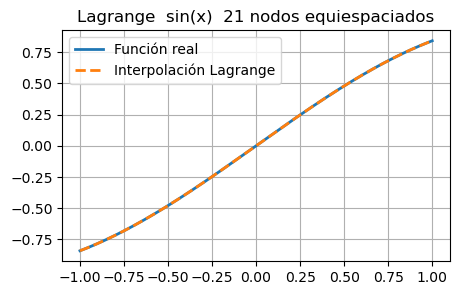

In [274]:
n = 21 # Número de nodos que vamos a usar para interpolar

# Generamos 21 nodos equiespaciados en el intervalo [a, b]
x_nodes = equispaced_nodes(a, b, n)

# Realizamos la interpolación de Lagrange con estos 21 nodos
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange  sin(x)  21 nodos equiespaciados")

error_21_eq = np.mean(error)
tiempo_21_eq = tiempo

##### Función 1 con los 21 nodos Chebyshev

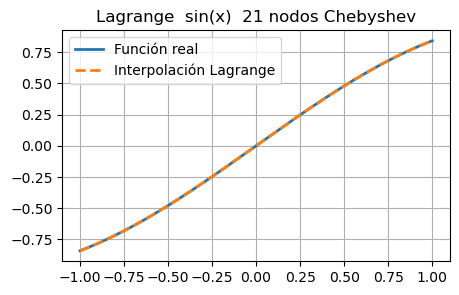

In [275]:
# Generamos los nodos de interpolación usando los nodos de Chebyshev para 21 puntos
x_nodes = chebyshev_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange con la función original f
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función real y el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange  sin(x)  21 nodos Chebyshev")

error_21_ch = np.mean(error)
tiempo_21_ch = tiempo

##### Tabla de resultados de interpolación con Lagrange

In [276]:
resultados = [
    ["sin(x)", "Lagrange", "Equiespaciados", 11, error_11_eq, tiempo_11_eq],
    ["sin(x)", "Lagrange", "Chebyshev", 11, error_11_ch, tiempo_11_ch],
    ["sin(x)", "Lagrange", "Equiespaciados", 21, error_21_eq, tiempo_21_eq],
    ["sin(x)", "Lagrange", "Chebyshev", 21, error_21_ch, tiempo_21_ch],
]

# Importamos pandas para mostrar los datos en el DataFrame
import pandas as pd
df = pd.DataFrame(resultados, columns=["Función", "Método", "Tipo de nodo", "Nº de nodos", "Error medio", "Tiempo (s)"])
df

,Función,Método,Tipo de nodo,Nº de nodos,Error medio,Tiempo (s)
0,sin(x),Lagrange,Equiespaciados,11,2.891763e-11,0.006944
1,sin(x),Lagrange,Chebyshev,11,1.527472e-11,0.006185
2,sin(x),Lagrange,Equiespaciados,21,2.396899e-09,0.017956
3,sin(x),Lagrange,Chebyshev,21,4.129643e-09,0.017137


##### Análisis de resultados de interpolación con Lagrange

##### Función sin(x)

<li>Se puede notar que el error medio es pequeño para ambas distribuciones de nodos con 11 y 21 puntos.</li>
<li>El error aumenta al pasar al nodo 21 mediante el análisis de Chebyshev.</li>
<li>Al usar 11 nodos mediante Chebyshev da un error más bajo que los equiespaciados.</li>
<li>Otro análisis que se puede notar es que mediante el tipo equiespaciados al usar ambos nodos 11 y 21 dan errores muy similares.</li>
<li>En cuanto al tiempo de ejecución se puede visualizar que a mayor cantidad de nodos el tiempo aumenta.</li>


## 📑 Función 2: f(x) = 1/(1+25x^2 ) 

##### Función 2 con los 11 nodos equiespaciados

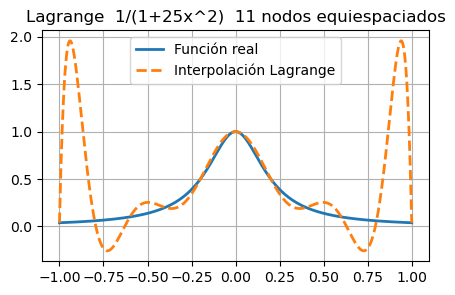

In [277]:
f = f2 # Seleccionamos la función f2, que es f(x) = 1 / (1 + 25x^2)
n = 11 # Definimos el número de nodos para interpolar 

# Generamos 11 nodos equiespaciados en el intervalo [a, b]
x_nodes = equispaced_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange con estos nodos
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange  1/(1+25x^2)  11 nodos equiespaciados")

error_f2_11_eq = np.mean(error)
tiempo_f2_11_eq = tiempo

##### Función 2 con los 11 nodos Chebyshev

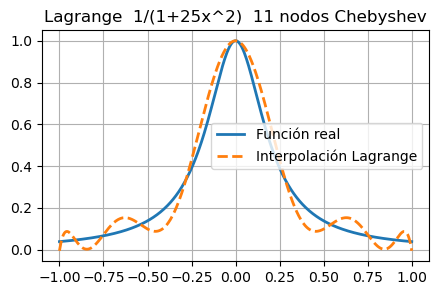

In [278]:
# Generamos los nodos de interpolación usando los nodos de Chebyshev para 11 puntos
x_nodes = chebyshev_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange con la función f2
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y la interpolación
plot_interp(f, x_eval, y_interp, "Lagrange  1/(1+25x^2)  11 nodos Chebyshev")

error_f2_11_ch = np.mean(error)
tiempo_f2_11_ch = tiempo

##### Función 2 con los 21 nodos equiespaciados

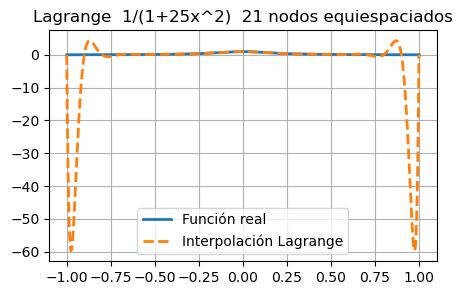

In [279]:
n = 21 # Actualizamos el número de nodos a 21 

# Generamos 21 nodos equiespaciados en el intervalo [a, b]
x_nodes = equispaced_nodes(a, b, n)

# Realizamos la interpolación de Lagrange con estos nodos
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange  1/(1+25x^2)  21 nodos equiespaciados")

error_f2_21_eq = np.mean(error)
tiempo_f2_21_eq = tiempo

##### Función 2 con los 21 nodos Chebyshev

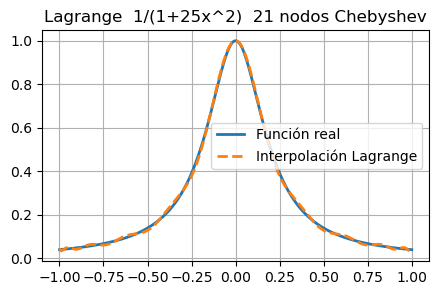

In [280]:
# Generamos los nodos de interpolación usando los nodos de Chebyshev para 21 puntos
x_nodes = chebyshev_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange con la función f2
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y la interpolación
plot_interp(f, x_eval, y_interp, "Lagrange  1/(1+25x^2)  21 nodos Chebyshev")

error_f2_21_ch = np.mean(error)
tiempo_f2_21_ch = tiempo

##### Tabla de resultados de interpolación con Lagrange

In [281]:
resultados_f2 = [
    ["1/(1+25x^2)", "Lagrange", "Equiespaciados", 11, error_f2_11_eq, tiempo_11_eq],
    ["1/(1+25x^2)", "Lagrange", "Chebyshev", 11, error_f2_11_ch, tiempo_11_ch],
    ["1/(1+25x^2)", "Lagrange", "Equiespaciados", 21, error_f2_21_eq, tiempo_21_eq],
    ["1/(1+25x^2)", "Lagrange", "Chebyshev", 21, error_f2_21_ch, tiempo_21_ch],
]

# Hacemos uso de pandas para mostrar los datos en el DataFrame
df = pd.DataFrame(resultados_f2, columns=["Función", "Método", "Tipo de nodo", "Nº de nodos", "Error medio", "Tiempo (s)"])
df

,Función,Método,Tipo de nodo,Nº de nodos,Error medio,Tiempo (s)
0,1/(1+25x^2),Lagrange,Equiespaciados,11,0.291520,0.006944
1,1/(1+25x^2),Lagrange,Chebyshev,11,0.048516,0.006185
2,1/(1+25x^2),Lagrange,Equiespaciados,21,3.451444,0.017956
3,1/(1+25x^2),Lagrange,Chebyshev,21,0.006443,0.017137


##### Análisis de resultados de interpolación con Lagrange

###### Función 1/(1+25x^2 )

<li>Se observa que el error aumenta significativamente cuando se usan 21 nodos mediante el tipo de nodo equiespaciados.</li>
<li>Al usar nodos de tipo Chebyshev el error se reduce tanto para 11 como para 21.</li>
<li>Con nodos de tipo Chebyshev se obtiene un mejor resultado con un error medio de 0.006443</li>
<li>En cuanto al tiempo de ejecución si son bajos en todos los casos aunque si aumenta de manera ligera al usar 21 nodos pero se considera aceptable</li>

## 📑 Función 3: f(x)=e^(-20x^2 )

##### Función 3 con los 11 nodos equiespaciados

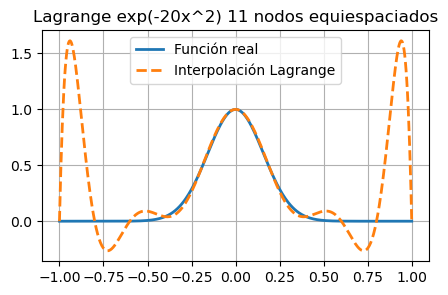

In [282]:
f = f3  # Seleccionamos la función f3, que es f(x) = exp(-20x^2)
n = 11  # Definimos el número de nodos para la interpolación, en este caso 11

# Generamos 11 nodos equiespaciados en el intervalo [a, b]
x_nodes = equispaced_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange usando los nodos
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange exp(-20x^2) 11 nodos equiespaciados")

error_f3_11_eq = np.mean(error)
tiempo_f3_11_eq = tiempo

##### Función 3 con los 11 nodos Chebyshev

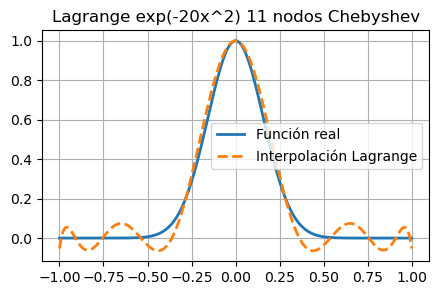

In [283]:
# Generamos los nodos de interpolación usando los nodos de Chebyshev para 11 puntos
x_nodes = chebyshev_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange con la función f3
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y la interpolación
plot_interp(f, x_eval, y_interp, "Lagrange exp(-20x^2) 11 nodos Chebyshev")

error_f3_11_ch = np.mean(error)
tiempo_f3_11_ch = tiempo

##### Función 3 con los 21 nodos equiespaciados

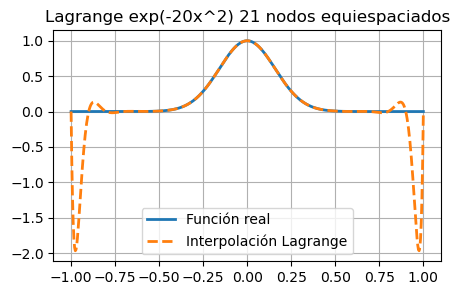

In [284]:
# Usamos 21 nodos
n = 21

# Generamos 21 nodos equiespaciados en el intervalo [a, b] = [-1, 1]
x_nodes = equispaced_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange con la función f3
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original y su interpolación
plot_interp(f, x_eval, y_interp, "Lagrange exp(-20x^2) 21 nodos equiespaciados")

error_f3_21_eq = np.mean(error)
tiempo_f3_21_eq = tiempo

##### Función 3 con los 21 nodos Chebyshev

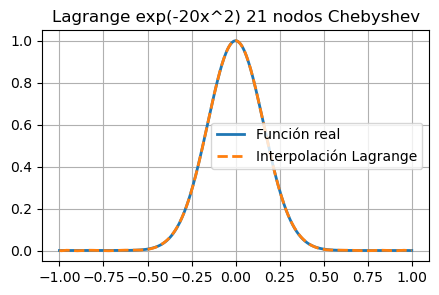

In [285]:
# Generamos 21 nodos de Chebyshev en el intervalo [a, b] = [-1, 1]
x_nodes = chebyshev_nodes(a, b, n)

# Ejecutamos la interpolación de Lagrange usando la función f3 (exp(-20x^2))
y_interp, error, tiempo, poly = evaluate_lagrange(f, x_nodes, x_eval)

# Graficamos la función original junto con el polinomio interpolador
plot_interp(f, x_eval, y_interp, "Lagrange exp(-20x^2) 21 nodos Chebyshev")

error_f3_21_ch = np.mean(error)
tiempo_f3_21_ch = tiempo

##### Tabla de resultados de interpolación con Lagrange

In [286]:
resultados_f3 = [
    ["exp(-20x^2)", "Lagrange", "Equiespaciados", 11, error_f3_11_eq, tiempo_11_eq],
    ["exp(-20x^2)", "Lagrange", "Chebyshev", 11, error_f3_11_ch, tiempo_11_ch],
    ["exp(-20x^2)", "Lagrange", "Equiespaciados", 21, error_f3_21_eq, tiempo_21_eq],
    ["exp(-20x^2)", "Lagrange", "Chebyshev", 21, error_f3_21_ch, tiempo_21_ch],
]

# Hacemos uso pandas para mostrar los datos en el DataFrame
df = pd.DataFrame(resultados_f3, columns=["Función", "Método", "Tipo de nodo", "Nº de nodos", "Error medio", "Tiempo (s)"])
df

,Función,Método,Tipo de nodo,Nº de nodos,Error medio,Tiempo (s)
0,exp(-20x^2),Lagrange,Equiespaciados,11,0.235706,0.006944
1,exp(-20x^2),Lagrange,Chebyshev,11,0.043810,0.006185
2,exp(-20x^2),Lagrange,Equiespaciados,21,0.112317,0.017956
3,exp(-20x^2),Lagrange,Chebyshev,21,0.000705,0.017137


##### Análisis de resultados de interpolación con Lagrange

###### Función exp(-20x^2)

<li>Se observa que con 11 nodos usando el tipo de nodo equiespaciados el error resulta ser alto con un 0.235706.</li>
<li>En cuanto a mejor rendimiento se puede observar que Chebyshev tiene una mejor precisión</li>
<li>Se puede analizar que al usar más nodo se tiene mejor interpolación a diferencia de la función anterior</li>
<li>En cuanto al tiempo de ejecución se observa que los tiempos aumentan con más nodos</li>

<h3 style="color: #104675"> ✅ 1.3. Método de diferencias dividas de Newton</h3>

En primer lugar, definimos las funciones con las que se trabaja en esta actividad son:  
$ f_1(x)= \sin(x),\quad f_2(x) = \frac{1}{1+25x^2},\quad f_3(x) = e^{-20x^2}$

In [18]:
## DEFINICIÓN DE LAS FUNCIONES

f1 = lambda x: np.sin(x) 
# np.sin permite operar con arrays. Para un escalar se puede usar math.sin.

f2 = lambda x: 1 / (1 + 25 * x**2)

f3 = lambda x: np.exp(-20 * x**2)  # ← corregido: math.exp no funciona con arrays

funciones = [f1, f2, f3]

<p>Antes de realizar las interpolaciones, hallamos los nodos; por un lado, los equiespaciados y por otro, los de Chebyshev. Ambos en el intervalo [-5,5]. 
  
Comencemos con los equiespaciados. </p>

In [19]:
# Nodos equiespaciados
nodos = [np.linspace(-5, 5, 11), np.linspace(-5, 5, 21)]

<p>Ahora, los nodos de Chebyshev. Es improtante tener en cuenta que los polinomios de Chebyshev están definidos en el intervalo [-1, 1], lo que hace que sus raíces (los nodos de interpolación) también estén en [-1, 1]. Si queremos usar estos nodos para interpolar una función definida en otro intervalo [a,b] necesitamos "transformar" los nodos de Chebyshev al nuevo intervalo. Esta transformación se hace mediante un cambio de variable lineal:  
$$raices_{finales} = 0.5*(b-a)*raíces_{cheb} + 0.5*(b+a) $$  
  
En nuestro caso, trabajamos con el intervalo [-5,5] con lo que bastará con multiplicar las raíces por 5.</p>

In [20]:
# Cálculo de los nodos de Chebyshev

# 11 nodos
n1 = 11

T11 = chebyshev.Chebyshev.basis(n1)  # polinomio de Chebyshev de grado n
r11 = T11.roots()                    # raíces del polinomio (nodos de Chebyshev en [-1, 1])

# Reescalado de los nodos al intervalo [-5, 5]
n11 = 5*r11

# 21 nodos
n2 = 21

T21 = chebyshev.Chebyshev.basis(n2)  # polinomio de Chebyshev de grado n
r21 = T21.roots()                    # raíces del polinomio (nodos de Chebyshev en [-1, 1])

# Reescalado de los nodos al intervalo [-5, 5]
n21 = 5*r21

nodos_cheb = [n11,n21]

### Representaciones gráficas

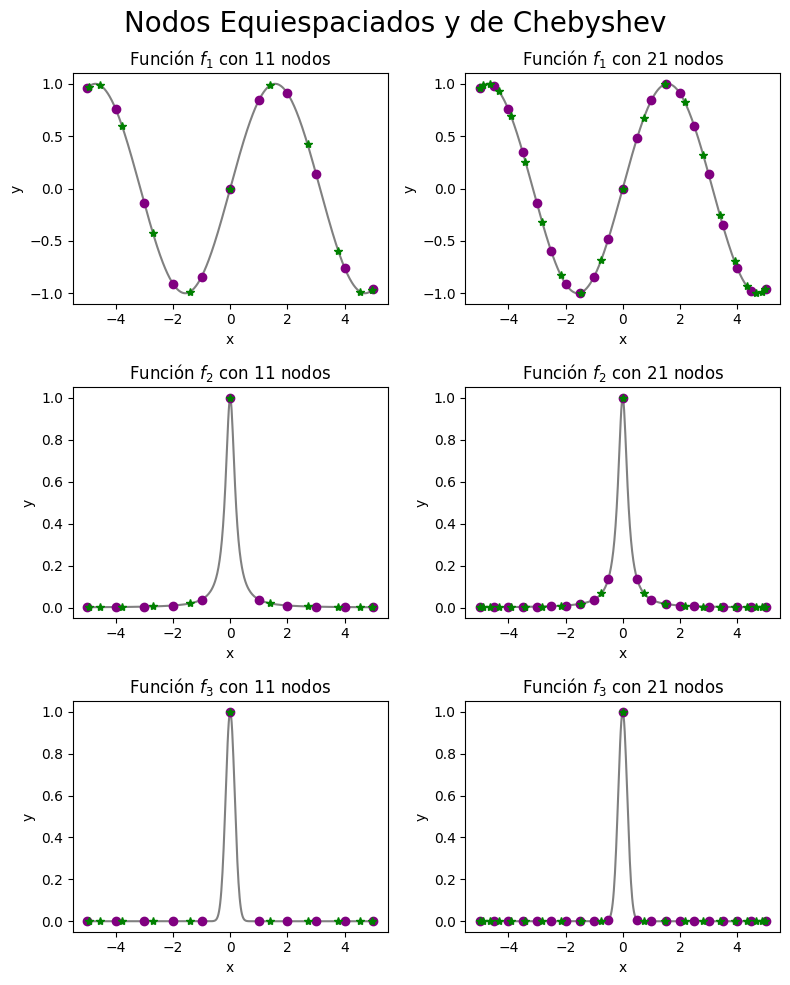

In [21]:
# Dominio para dibujar las funciones
x = np.linspace(-5, 5, 500)

# Crear una figura donde habrá 6 gráficas distribuidas en 3 filas y 2 columnas
    ## Fila i = función fi
    ## Colmna 1 : 11 nodos, columna 2: 21 nodos
fig, ax = plt.subplots(3, 2)

# Ajustamos la medida
fig.set_size_inches(8, 10)

cant_nodos = [11, 21]  # Cantidad de nodos usada en cada columna

# Recordatorio de las variables que tenemos:
## funciones = [f1, f2, f3]
## nodos = [11 equiesp. , 21 equiesp.]
## nodos_cheb = [11 nodos cheb, 21 nodos cheb]

for i in range(3):  # Recorre filas ( cada fila es una función)
    f = funciones[i]

    for j in range(2):  # Recorre columnas; cada columna corresponde a 11 y 21 nodos respectivamente
        n = nodos[j] #nodos equiesp
        nc = nodos_cheb[j] # nodos cheb

        # Función real
        ax[i][j].plot(x, f(x), label=f"$f_{{{i + 1}}}$", color='grey')

        # Nodos
        ax[i][j].plot(n, f(n), 'o', color='purple', label='Equiesp.')
        ax[i][j].plot(nc, f(nc), '*', color='green', label='Chebyshev')

        # Etiquetas a los ejes
        ax[i][j].set_xlabel('x')
        ax[i][j].set_ylabel('y')

        # Título
        ax[i][j].set_title(f"Función $f_{{{i + 1}}}$ con {cant_nodos[j]} nodos")

fig.suptitle("Nodos Equiespaciados y de Chebyshev", fontsize=20)
plt.tight_layout()
plt.show()

### DIFERENCIAS DE NEWTON

In [22]:
# Función para interpolación mediante diferencias divididas de Newton

import sympy as sp  
# permite trabajar con expresiones matemáticas de forma simbólica, no sólo numérica.


def dd_newton(x, fx): # (x,fx) son los nodos conocidos para crear el polinomio interpolador de Newton
    n = len(x) # número de nodos

    # Creación de la tabla de diferencias divididas
    # matriz nxn de ceros:
    F = [[0] * n for _ in range(n)] 

    # La primera columna es simplemente los valores de fx
    for i in range(n):
        F[i][0] = fx[i]
    
    # Calcular las diferencias divididas e introducirlas en la tabla
    for j in range(1, n):
        for i in range(n - j): # En cada columna se calcula una diferencia dividida menos que en la columna anterior
            F[i][j] = (F[i + 1][j - 1] - F[i][j - 1]) / (x[i + j] - x[i])

    # Crear el polinomio usando las diferencias divididas
    X = sp.symbols('x') # 'x' es una variable simbólica
    
    polinomio = F[0][0] # El primer valor fx de los nodos es el término independiente del polinomio, no se multiplica por nada

    producto = 1
    for i in range(1, n):
        producto *= (X - x[i - 1])     # En cada iteración se añade un factor más
        polinomio += F[0][i] * producto

    # polinomio es una expresión simbólica, para que sea una función evaluable:
    pol_new = sp.lambdify(X, polinomio, "numpy")
    return pol_new

#### Representación gráfica:

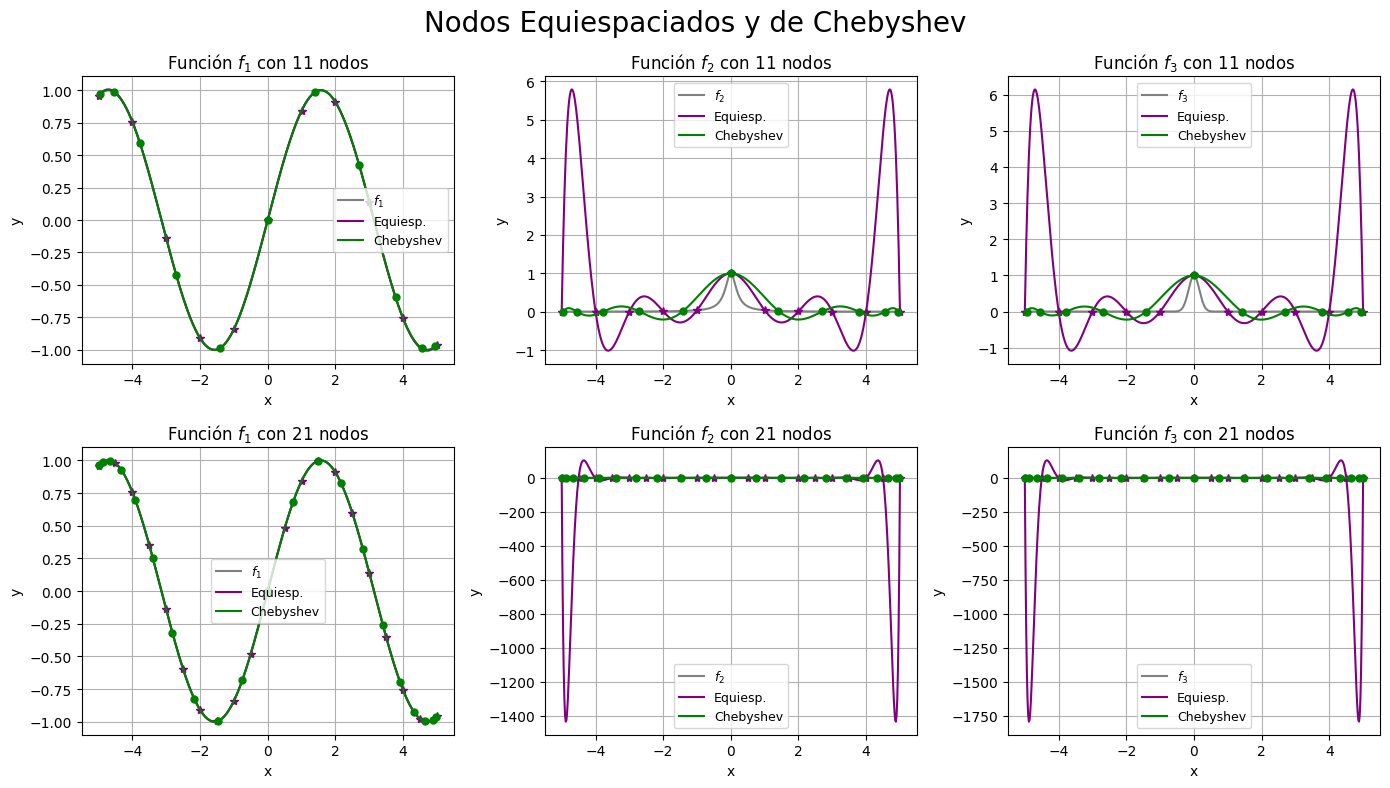

In [23]:
# Interpolación de Diferencias Divididas en nodos equiespaciados y Chebyshev

#funciones = [f1,f2,f3]
## nodos = [11 equiesp. , 21 equiesp.]
## nodos_cheb = [11 nodos cheb, 21 nodos cheb]
## cant_nodos = [11, 21]  # Cantidad de nodos usada en cada columna

# FORMA DE LA FIGURA:
## f1 con 11 nodos  / f2 con 11 nodos / f3 con 11 nodos
## f1 con 21 nodos / f2 con 21 nodos / f3 con 21 nodos


###################################################
#Dimensión de la figura: 2 filas x 3 columnas
fig, axes = plt.subplots(2,3)

# Ajustamos la medida de cada gráfico
fig.set_size_inches(14, 8)

x = np.linspace(-5,5,500)

for j in range(3):  # Recorre columnas (cada columna es una función)
    f = funciones[j]

    for i in range(2):  # Recorre filas; Fila 1 = 11 nodos , Fila 2 = 21 nodos
        n = nodos[i]
        nc = nodos_cheb[i]

        ax = axes[i][j]

        # polinomios interpoladores
        pol_equi = dd_newton(n,f(n))
        pol_cheb = dd_newton(nc,f(nc))
        
        # Función real
        ax.plot(x, f(x), label=f"$f_{{{j + 1}}}$", color='grey')

        # Nodos
        ax.plot(x, pol_equi(x), '-', color='purple', label='Equiesp.')
        ax.plot(n,f(n),'*',color='purple')
        ax.plot(x, pol_cheb(x), '-', color='green', label='Chebyshev')
        ax.plot(nc,f(nc),'o',color='green', markersize=5)

        # Etiquetas a los ejes
        ax.set_xlabel('x')
        ax.set_ylabel('y')

        ax.legend(fontsize=9)
        ax.grid(True)

        # Título
        ax.set_title(f"Función $f_{{{j + 1}}}$ con {cant_nodos[i]} nodos")

fig.suptitle("Nodos Equiespaciados y de Chebyshev", fontsize=20)
plt.tight_layout()
plt.show()


### ERRORES Y TIEMPO

#### Diferencias divididas de Newton

In [25]:
import pandas as pd
import time

tipo_nodo = ["Equiespaciado","Chebyshev"]
datos = { "Función":[] , "nodos":[], "Tipo nodo   ":[],"Error máximo":[],"Tiempo":[]}

# Recordatorio:
## funciones = [f1,f2,f3]
## nodos = [11 equiesp. , 21 equiesp.]
## nodos_cheb = [11 nodos cheb, 21 nodos cheb]
## cant_nodos = [11, 21]  # Cantidad de nodos usada en cada columna
N = [nodos, nodos_cheb]
tipo = ["Equiespaciados", "Chebyshev   "]

# Punto donde se evalúa
x = np.linspace(-5,5,100)

for i in range(3):  # Recorrer funciones
    f = funciones[i]

    for j in range(2):  # Recorrer tipos de nodos
        n = N[j]        # j = 0 : equiesp. / j = 1 cheby.
        t = tipo[j]

        for x_nodos in n:  # par = 11 nodos / 21 nodos
            y_nodos = f(x_nodos)

            ## Cálculo del polinomio interpolador
            t_inicial = time.time()
            p = dd_newton(x_nodos, y_nodos)  # función interpoladora
            t_final = time.time() - t_inicial

            valor_aprox = p(x)
            f_real = f(x)
            # Error absoluto (en todo el intervalo [-5,5])
            errores = np.abs(f_real- valor_aprox)

            # Error máximo
            error_max = np.max(errores)

            datos["Función"].append(f"f{i+1}")
            datos["nodos"].append(len(x_nodos))
            datos["Tipo nodo   "].append(t)
            datos["Error máximo"].append(error_max)
            datos["Tiempo"].append(t_final)

df = pd.DataFrame(datos)

print('---------------- DIFERENCIAS DIVIDIDAS DE NEWTON ---------------- \n')

print(df)


---------------- DIFERENCIAS DIVIDIDAS DE NEWTON ---------------- 

   Función  nodos    Tipo nodo     Error máximo    Tiempo
0       f1     11  Equiespaciados  6.294517e-03  0.012810
1       f1     21  Equiespaciados  1.684943e-09  0.048215
2       f1     11    Chebyshev     7.575129e-04  0.015674
3       f1     21    Chebyshev     7.437384e-12  0.053036
4       f2     11  Equiespaciados  5.790732e+00  0.014036
5       f2     21  Equiespaciados  1.401060e+03  0.051312
6       f2     11    Chebyshev     6.835409e-01  0.014615
7       f2     21    Chebyshev     4.533066e-01  0.060785
8       f3     11  Equiespaciados  6.145816e+00  0.013828
9       f3     21  Equiespaciados  1.753814e+03  0.047294
10      f3     11    Chebyshev     8.261701e-01  0.014705
11      f3     21    Chebyshev     5.889545e-01  0.048929


<h1 style="color: #104675">Tarea 2. Interpolación con splines</h1>

In [34]:
def evaluar_splines_cubicos(f, x_nodes, x_eval):
    y_nodes = f(x_nodes)
    start = time.time()                      # se inicia el tiempo
    poly = InterpolatedUnivariateSpline(x_nodes, y_nodes) # Segun la documentación de scipy, si no se define el grado, se usa un spline cúbico
    y_interp = poly(x_eval)                  # se procede a evaluar el polinomio
    elapsed = time.time() - start            # se mide el tiempo
    error = error_abs(f(x_eval), y_interp)     # se calcula el error 
    return y_interp, error, elapsed, poly

def plot_interp_splines(f, x_eval, y_interp, title):
    plt.figure(figsize=(5, 3))
    plt.plot(x_eval, f(x_eval), label='Función real', lw=2)
    plt.plot(x_eval, y_interp, '--', label='Interpolación Splines Cubicos', lw=2)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_en_subplot(ax, f, x_eval, y_interp, title):
    """
    Dibuja la función real y la interpolación en un subplot (ax) dado.
    """
    ax.plot(x_eval, f(x_eval), label='Función real', lw=2)
    ax.plot(x_eval, y_interp, '--', label='Interpolación Splines Cúbicos', lw=2)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

In [ ]:
def comparar_interpolacion_splines_analisis(func_a_interpolar, lista_cant_nodos, x_denso, nombre_funcion_str=None):
    """
    Realiza la interpolación con splines cúbicos para diferentes cantidades y tipos de nodos.
    Los nodos equiespaciados y de Chebyshev se generan en [-1, 1].
    Genera una cuadrícula de gráficos y un DataFrame con los resultados.

    Args:
        func_a_interpolar (callable): La función f(x) que se va a interpolar.
        lista_cant_nodos (list): Lista de enteros con las cantidades de nodos a probar (ej. [11, 21]).
        x_denso (np.array): Array de puntos para evaluación y graficación.
        nombre_funcion_str (str, optional): Nombre descriptivo de la función para el título del gráfico.
                                            Si es None, se intentará usar func_a_interpolar.__name__.

    Retorna:
        pandas.DataFrame: DataFrame con los campos: 'n_nodos', 'tipo_nodo', 'error', 'tiempo_s'.
    """

    num_filas_plot = len(lista_cant_nodos)
    num_cols_plot = 2

    fig, axs = plt.subplots(num_filas_plot, num_cols_plot, figsize=(12, 5 * num_filas_plot), sharex=True, sharey=True)
    if num_filas_plot == 1:
        axs = np.array([axs])

    resultados = []

    for i, n_nodos in enumerate(lista_cant_nodos):
        x_eq = nodos_equiespaciados(n_nodos)
        y_interp_eq, error_eq, tiempo_eq, _ = evaluar_splines_cubicos(func_a_interpolar, x_eq, x_denso)
        resultados.append({
            'n_nodos': n_nodos,
            'tipo_nodo': 'Equiespaciado',
            'error': error_eq,
            'tiempo_s': tiempo_eq
        })
        titulo_eq = f'Splines: {n_nodos} Nodos Equiespaciados'
        plot_en_subplot(axs[i, 0], func_a_interpolar, x_denso, y_interp_eq, titulo_eq)

        x_ch = nodos_chebyshev(n_nodos)
        x_ch = np.sort(x_ch) # Asegurar orden creciente para InterpolatedUnivariateSpline

        y_interp_ch, error_ch, tiempo_ch, _ = evaluar_splines_cubicos(func_a_interpolar, x_ch, x_denso)
        resultados.append({
            'n_nodos': n_nodos,
            'tipo_nodo': 'Chebyshev',
            'error': error_ch,
            'tiempo_s': tiempo_ch
        })
        titulo_ch = f'Splines: {n_nodos} Nodos Chebyshev'
        plot_en_subplot(axs[i, 1], func_a_interpolar, x_denso, y_interp_ch, titulo_ch)

    # --- Lógica del título global modificada ---
    if nombre_funcion_str:
        fig_title_prefix = f'Comparación de Interpolación con Splines Cúbicos para f(x) = {nombre_funcion_str}'
    else:
        fig_title_prefix = f'Comparación de Interpolación con Splines Cúbicos para f(x)'
    
    fig.suptitle(fig_title_prefix, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar rect para que el suptitle no se solape
    plt.show()
    print("Dataframe de resultados:")
    print("--------------------------------------------------")
    df_resultados = pd.DataFrame(resultados)
    return df_resultados

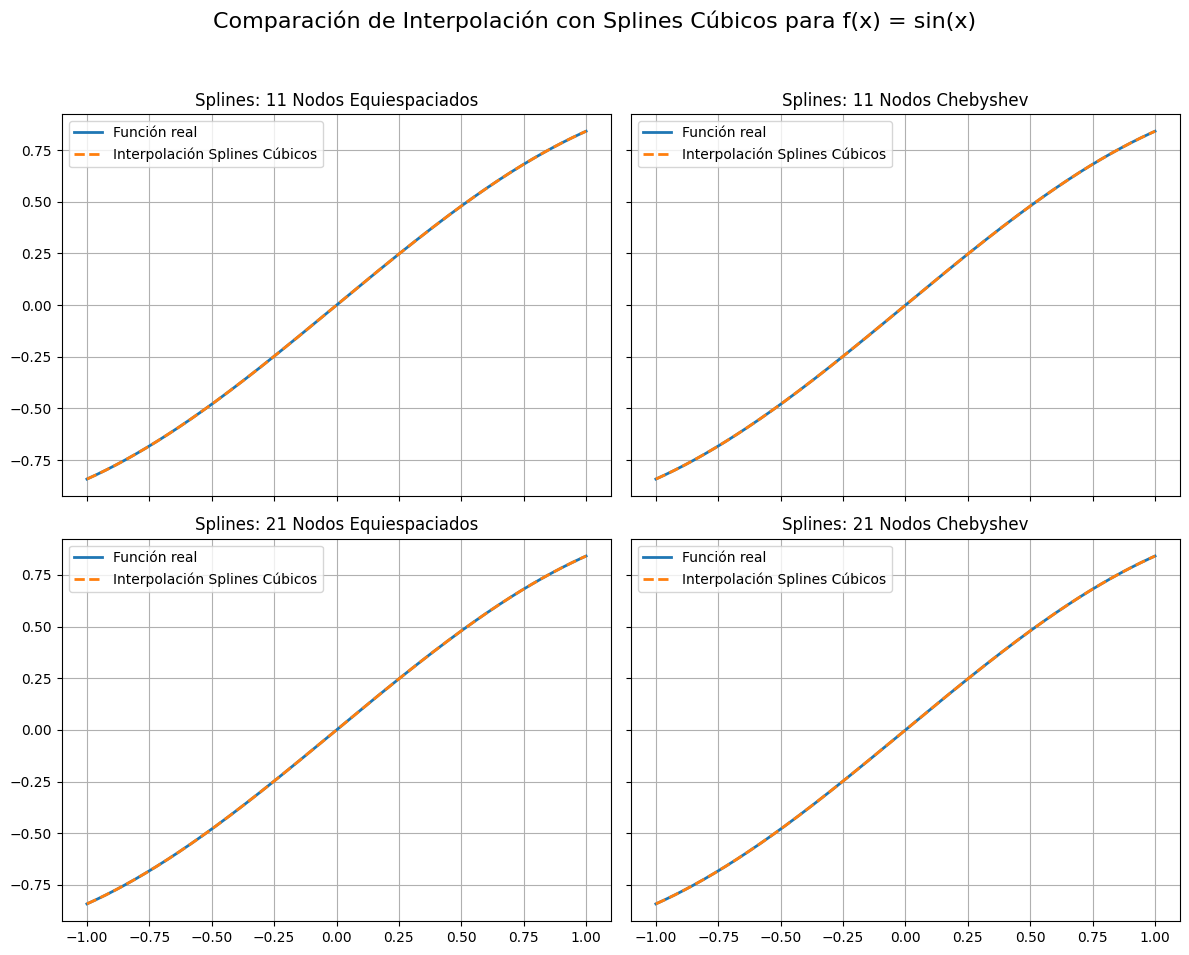

Dataframe de resultados:
--------------------------------------------------


,n_nodos,tipo_nodo,error,tiempo_s
0,11,Equiespaciado,0.000239,0.000145
1,11,Chebyshev,0.000055,0.000087
2,21,Equiespaciado,0.000012,0.000108
3,21,Chebyshev,0.000004,0.000082


In [50]:
comparar_interpolacion_splines_analisis(f1, [11, 21], x_denso, "sin(x)")

Conclusiones de esta seccion:

* Visualmente, los errores no son significativos para la funcion seno.
* Para nodos equiespaciados, se observa una disminucion de ~95% del error al subir la cantidad de nodos. Esta disminucion vino acompañada de un mayor tiempo de ejecucion
* Entre nodos de Chebyshev, se observa una disminucion de ~93% al incrementar el numero de nodos. Curiosamente, el tiempo de ejecucion se redujo al aumentar el numero de nodos.
* Entre nodos equiespaciados y de Chebyshev, siempre se obtuvo un mejor resultado (i.e., un menor error) para los ultimos.

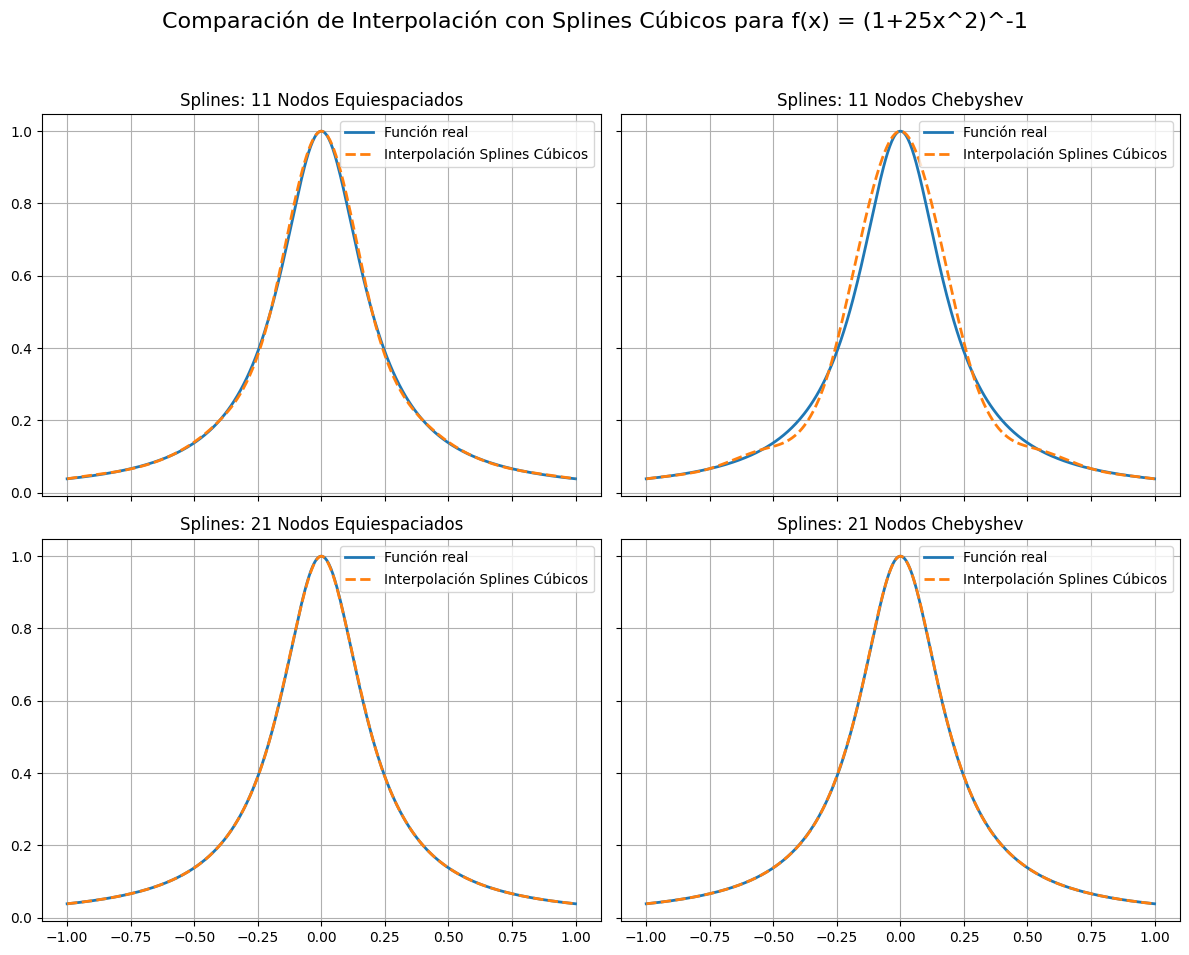

Dataframe de resultados:
--------------------------------------------------


,n_nodos,tipo_nodo,error,tiempo_s
0,11,Equiespaciado,0.160300,0.000176
1,11,Chebyshev,0.676564,0.000427
2,21,Equiespaciado,0.019632,0.000252
3,21,Chebyshev,0.013999,0.000130


In [53]:
comparar_interpolacion_splines_analisis(f2, [11, 21], x_denso, "(1+25x^2)^-1")

Conclusiones de esta seccion:

* Visualmente, se observa un mayor error para 11 nodos de Chebyshev.
* Se confirma que se elimina el "fenomeno de Runge" al utilizar splines cubicos.
* Para nodos equiespaciados, se observa una disminucion de ~88% del error al subir la cantidad de nodos. 
* Entre nodos de Chebyshev, se observa una disminucion de ~98% al incrementar el numero de nodos. 
* Curiosamente, el tiempo de ejecucion se redujo al aumentar el numero de nodos para ambos tipos.
* A diferencia de la funcion seno del item anterior, para 11 nodos se obtuvo un menor error para nodos equiespaciados.

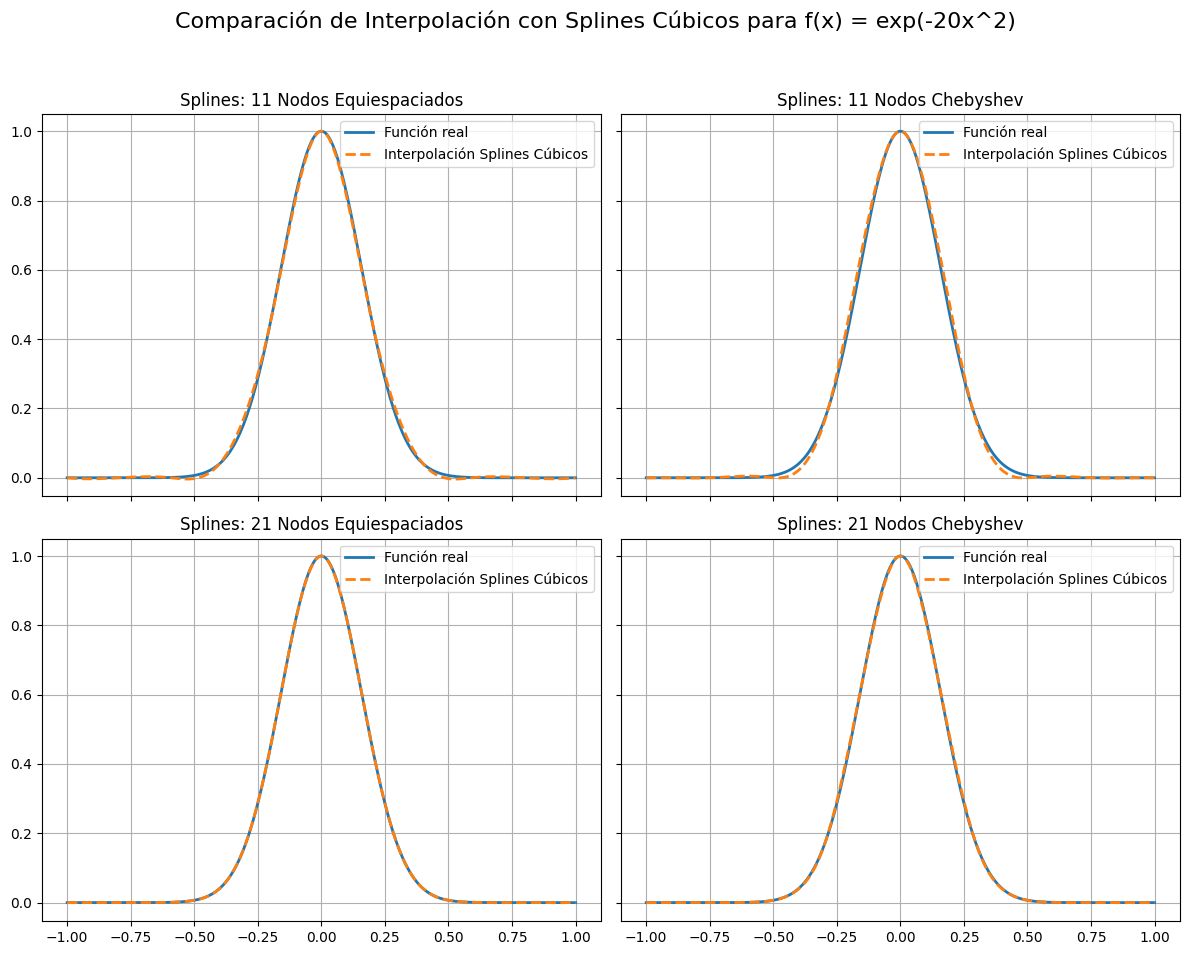

Dataframe de resultados:
--------------------------------------------------


,n_nodos,tipo_nodo,error,tiempo_s
0,11,Equiespaciado,0.150127,0.000133
1,11,Chebyshev,0.253617,0.000125
2,21,Equiespaciado,0.009461,0.000099
3,21,Chebyshev,0.063724,0.000113


In [56]:
comparar_interpolacion_splines_analisis(f3, [11, 21], x_denso, "exp(-20x^2)")

Para esta seccion:
* Para nodos equiespaciados, el error se reduce ~94% al aumentar la cantidad de nodos.
* Para nodos de Chebyshev, esta disminucion es de ~75%.
* Se observan dos cosas curiosas: (i) los aumentos de la cantidad de nodos no van acompanados de incrementos en los tiempos de ejecucion y (ii) para esta funcion, siempre se obtiene un mejor resultado para nodos equiespaciados.

In [58]:
print("Parece que la tenemos lista :) Att. Ricardo 20250517")

Parece que la tenemos lista :) Att. Ricardo 20250517
